In [4]:
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

## Experiment parameters

In [5]:
# Number of time windows
T = 18

# Target 1-coverage for conformal prediction
alpha = 0.1

data_name="School"

## Load results

In [6]:
# results_file = 'results/Conformal_GNN_School_Results_Final_10_100_50.pkl'
# results_file = 'results/school_with_assisted_semi_ind.pkl'
results_file = 'results/School_SAPS.pkl'

with open(results_file, 'rb') as file:
    results = pickle.load(file)

Save figures into a special folder.

In [7]:
save_figs = False
output_file_prefix = 'figures/School_'
output_file_suffix = '_10_100_50.pdf'

In [8]:
xlabels = ['', '10am', '', '12pm', '\nDay 1', '2pm', '', '4pm', '',
           '', '10am', '', '12pm', '\nDay 2', '2pm', '', '4pm', '']

## Summary results

In [9]:
methods = ['BD', 'UA']
GNN_models = ['GCN', 'GAT']
regimes = ['Assisted Semi-Ind', 'Trans', 'Semi-Ind']
# regimes = ['Trans', 'Semi-Ind']
outputs = ['Accuracy', 'Avg Size', 'Coverage']

In [10]:
methods_list = []
GNN_models_list = []
regimes_list = []
outputs_list = []
stat_types_list = []
stats_list = []

for (method, GNN_model, regime, output) in product(methods, GNN_models, regimes, outputs):

    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('Mean')
    stats_list.append(np.round(np.mean(results[method][GNN_model][regime][output]['All']), 3))
    
    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('St Dev')
    stats_list.append(np.round(np.std(results[method][GNN_model][regime][output]['All']), 3))
    
output = "TSC"
for (method, GNN_model, regime) in product(methods, GNN_models, regimes):
    # if regime == "Semi-Ind":
    #     num_vals = 50
    # elif regime in ["Assisted Semi-Ind", "Assisted Semi-Ind"]:
    #     # num_vals = 1000

    num_vals = len(results[method][GNN_model][regime]['Coverage']['All'])

    T_output = np.where(np.array([len(results[method][GNN_model][regime]["Coverage"][t]) for t in range(T)]) > 0)[0]


    covs = np.zeros((T, num_vals))
    for t in T_output:
        covs[t] = results[method][GNN_model][regime]["Coverage"][t]

    # min_covs = []
    # for cov_run in range(num_vals):
    #     covs_for_run = covs[:, cov_run]
    #     covs_for_run = covs_for_run[covs_for_run > 0]
    #     min_covs.append(np.min(covs_for_run))

    TSC = []
    for t in T_output:
        TSC.append(np.mean(covs[t, :]))

    min_TSC_idx = np.argmin(TSC)
    min_TSC = TSC[min_TSC_idx]
    std_min_TSC = np.std(covs[T_output[min_TSC_idx], :])


    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('Mean')
    stats_list.append(np.round(min_TSC, 3))

    methods_list.append(method)
    GNN_models_list.append(GNN_model)
    regimes_list.append(regime)
    outputs_list.append(output)
    stat_types_list.append('St Dev')
    stats_list.append(np.round(std_min_TSC, 3)) 


df_summary = pd.DataFrame({
    'method'   : methods_list,
    'GNN model': GNN_models_list,
    'regime'   : regimes_list,
    'output'   : outputs_list,
    'statistic': stat_types_list,
    'value'    : stats_list
})

Display full table of statistics.

In [11]:
print(df_summary)

   method GNN model             regime    output statistic  value
0      BD       GCN  Assisted Semi-Ind  Accuracy      Mean  0.104
1      BD       GCN  Assisted Semi-Ind  Accuracy    St Dev  0.008
2      BD       GCN  Assisted Semi-Ind  Avg Size      Mean  8.416
3      BD       GCN  Assisted Semi-Ind  Avg Size    St Dev  0.044
4      BD       GCN  Assisted Semi-Ind  Coverage      Mean  0.855
..    ...       ...                ...       ...       ...    ...
91     UA       GAT  Assisted Semi-Ind       TSC    St Dev  0.029
92     UA       GAT              Trans       TSC      Mean  0.875
93     UA       GAT              Trans       TSC    St Dev  0.044
94     UA       GAT           Semi-Ind       TSC      Mean  0.879
95     UA       GAT           Semi-Ind       TSC    St Dev  0.000

[96 rows x 6 columns]


In [12]:
df_summary[df_summary['output'] == 'Coverage']

,method,GNN model,regime,output,statistic,value
4,BD,GCN,Assisted Semi-Ind,Coverage,Mean,0.855
5,BD,GCN,Assisted Semi-Ind,Coverage,St Dev,0.012
10,BD,GCN,Trans,Coverage,Mean,0.961
11,BD,GCN,Trans,Coverage,St Dev,0.005
16,BD,GCN,Semi-Ind,Coverage,Mean,0.779
17,BD,GCN,Semi-Ind,Coverage,St Dev,0.000
22,BD,GAT,Assisted Semi-Ind,Coverage,Mean,0.834
23,BD,GAT,Assisted Semi-Ind,Coverage,St Dev,0.026
28,BD,GAT,Trans,Coverage,Mean,0.959
29,BD,GAT,Trans,Coverage,St Dev,0.006


In [13]:
df_summary[df_summary['output'] == 'Avg Size']

,method,GNN model,regime,output,statistic,value
2,BD,GCN,Assisted Semi-Ind,Avg Size,Mean,8.416
3,BD,GCN,Assisted Semi-Ind,Avg Size,St Dev,0.044
8,BD,GCN,Trans,Avg Size,Mean,5.510
9,BD,GCN,Trans,Avg Size,St Dev,0.079
14,BD,GCN,Semi-Ind,Avg Size,Mean,8.000
15,BD,GCN,Semi-Ind,Avg Size,St Dev,0.000
20,BD,GAT,Assisted Semi-Ind,Avg Size,Mean,8.498
21,BD,GAT,Assisted Semi-Ind,Avg Size,St Dev,0.147
26,BD,GAT,Trans,Avg Size,Mean,5.184
27,BD,GAT,Trans,Avg Size,St Dev,0.087


In [ ]:
df_summary["name"] = df_summary["method"] + " " + df_summary["GNN model"]

replace_dict = {
    "BD GCN": "Block GCN",
    "BD GAT": "Block GAT",
    "UA GCN": "UGCN",
    "UA GAT": "UGAT",
}

df_summary["name"] = df_summary["name"].replace(replace_dict)


output="TSC"

table_start_str = (
    "\\begin{table}[h]\n\\centering\n\\begin{tabular}{|l|l|l|}\n\\hline\nEmbedding & \\multicolumn{2}{c|}{"
    + data_name
    + "} \\\ \n\\cline{2-3}\n& Trans. & Semi-ind.  \\\ \n\\hline\n"
)

# table_data_1 = "ISE & $0.505 \\pm 0.000$ & $0.248 \\pm 0.000$ \\\\ \\hline\n"


table_data = ""
# Loop over each unique method + regime pair
for (GNN_model, method) in product(GNN_models, methods):

    max_trans_acc = df_summary[
        (df_summary["regime"] == "Trans") & (df_summary["output"] == output) & (df_summary["GNN model"] == GNN_model)
    ]["value"].max()
    max_semi_ind_acc = df_summary[
        (df_summary["regime"] == "Semi-Ind") & (df_summary["output"] == output) & (df_summary["GNN model"] == GNN_model)
    ]["value"].max()

    trans_acc = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Trans")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "Mean")
    ]["value"].values[0]
    trans_std = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Trans")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "St Dev")
    ]["value"].values[0]
    semi_ind_acc = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "Mean")
    ]["value"].values[0]
    semi_ind_std = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "St Dev")
    ]["value"].values[0]

    method_name = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
    ]["name"].values[0]
    

    if trans_acc != max_trans_acc:
        table_data += f"{method_name} & {trans_acc:.3f} $\\pm$ {trans_std:.3f}"
    else:
        table_data += (
            method_name + " & \\textbf{" + f"{trans_acc:.3f} $\\pm$ {trans_std:.3f}" + "}"
        )

    if semi_ind_acc != max_semi_ind_acc:
        table_data += f" & ${semi_ind_acc:.3f} \\pm {semi_ind_std:.3f}$ \\\\ \\hline\n"
    else:
        table_data += (
            " & \\textbf{"
            + f"{semi_ind_acc:.3f} $\\pm$ {semi_ind_std:.3f}"
            + "} \\\\ \\hline\n"
        )

table_end_str = (
    "\\end{tabular}\n\\caption{}\n\\label{tab:"
    + data_name
    + "_"+output+"}\n\\end{table}"
)

full_table = table_start_str + table_data + table_end_str

print(full_table)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# NOTE: this is only for the assisted semi-inductive (messy coding I know)


df_summary["name"] = df_summary["method"] + " " + df_summary["GNN model"]


replace_dict = {
    "BD GCN": "Block GCN",
    "BD GAT": "Block GAT",
    "UA GCN": "UGCN",
    "UA GAT": "UGAT",
}

df_summary["name"] = df_summary["name"].replace(replace_dict)


output="TSC"

table_start_str = (
    "\\begin{table}[h]\n\\centering\n\\begin{tabular}{|l|l|l|}\n\\hline\nEmbedding & \\multicolumn{2}{c|}{"
    + data_name
    + "} \\\ \n\\cline{2-3}\n& Trans. & Semi-ind.  \\\ \n\\hline\n"
)

# table_data_1 = "ISE & $0.505 \\pm 0.000$ & $0.248 \\pm 0.000$ \\\\ \\hline\n"


table_data = ""
# Loop over each unique method + regime pair
for (GNN_model, method) in product(GNN_models, methods):

    max_trans_acc = df_summary[
        (df_summary["regime"] == "Assisted Semi-Ind") & (df_summary["output"] == output) & (df_summary["GNN model"] == GNN_model)
    ]["value"].max()
    trans_acc = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Assisted Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "Mean")
    ]["value"].values[0]
    trans_std = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Assisted Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "St Dev")
    ]["value"].values[0]
    semi_ind_acc = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Assisted Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "Mean")
    ]["value"].values[0]
    semi_ind_std = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
        & (df_summary["regime"] == "Assisted Semi-Ind")
        & (df_summary["output"] == output)
        & (df_summary["statistic"] == "St Dev")
    ]["value"].values[0]

    method_name = df_summary[
        (df_summary["method"] == method)
        & (df_summary["GNN model"] == GNN_model)
    ]["name"].values[0]
    

    if trans_acc != max_trans_acc:
        table_data += f"{method_name} & {trans_acc:.3f} $\\pm$ {trans_std:.3f}"
    else:
        table_data += (
            method_name + " & \\textbf{" + f"{trans_acc:.3f} $\\pm$ {trans_std:.3f}" + "}"
        )

    if semi_ind_acc != max_semi_ind_acc:
        table_data += f" & ${semi_ind_acc:.3f} \\pm {semi_ind_std:.3f}$ \\\\ \\hline\n"
    else:
        table_data += (
            " & \\textbf{"
            + f"{semi_ind_acc:.3f} $\\pm$ {semi_ind_std:.3f}"
            + "} \\\\ \\hline\n"
        )

table_end_str = (
    "\\end{tabular}\n\\caption{}\n\\label{tab:"
    + data_name
    + "_"+output+"}\n\\end{table}"
)

full_table = table_start_str + table_data + table_end_str

print(full_table)

\begin{table}[h]
\centering
\begin{tabular}{|l|l|l|}
\hline
Embedding & \multicolumn{2}{c|}{School} \\ 
\cline{2-3}
& Trans. & Semi-ind.  \\ 
\hline
Block GCN & \textbf{0.895 $\pm$ 0.065}UGCN & 0.653 $\pm$ 0.104Block GAT & \textbf{0.916 $\pm$ 0.082}UGAT & 0.833 $\pm$ 0.085\end{tabular}
\caption{}
\label{tab:School_TSC}
\end{table}


## Plot results

FileNotFoundError: [Errno 2] No such file or directory: 'figures/School_Trans_GCN_Accuracy_10_100_50.pdf'

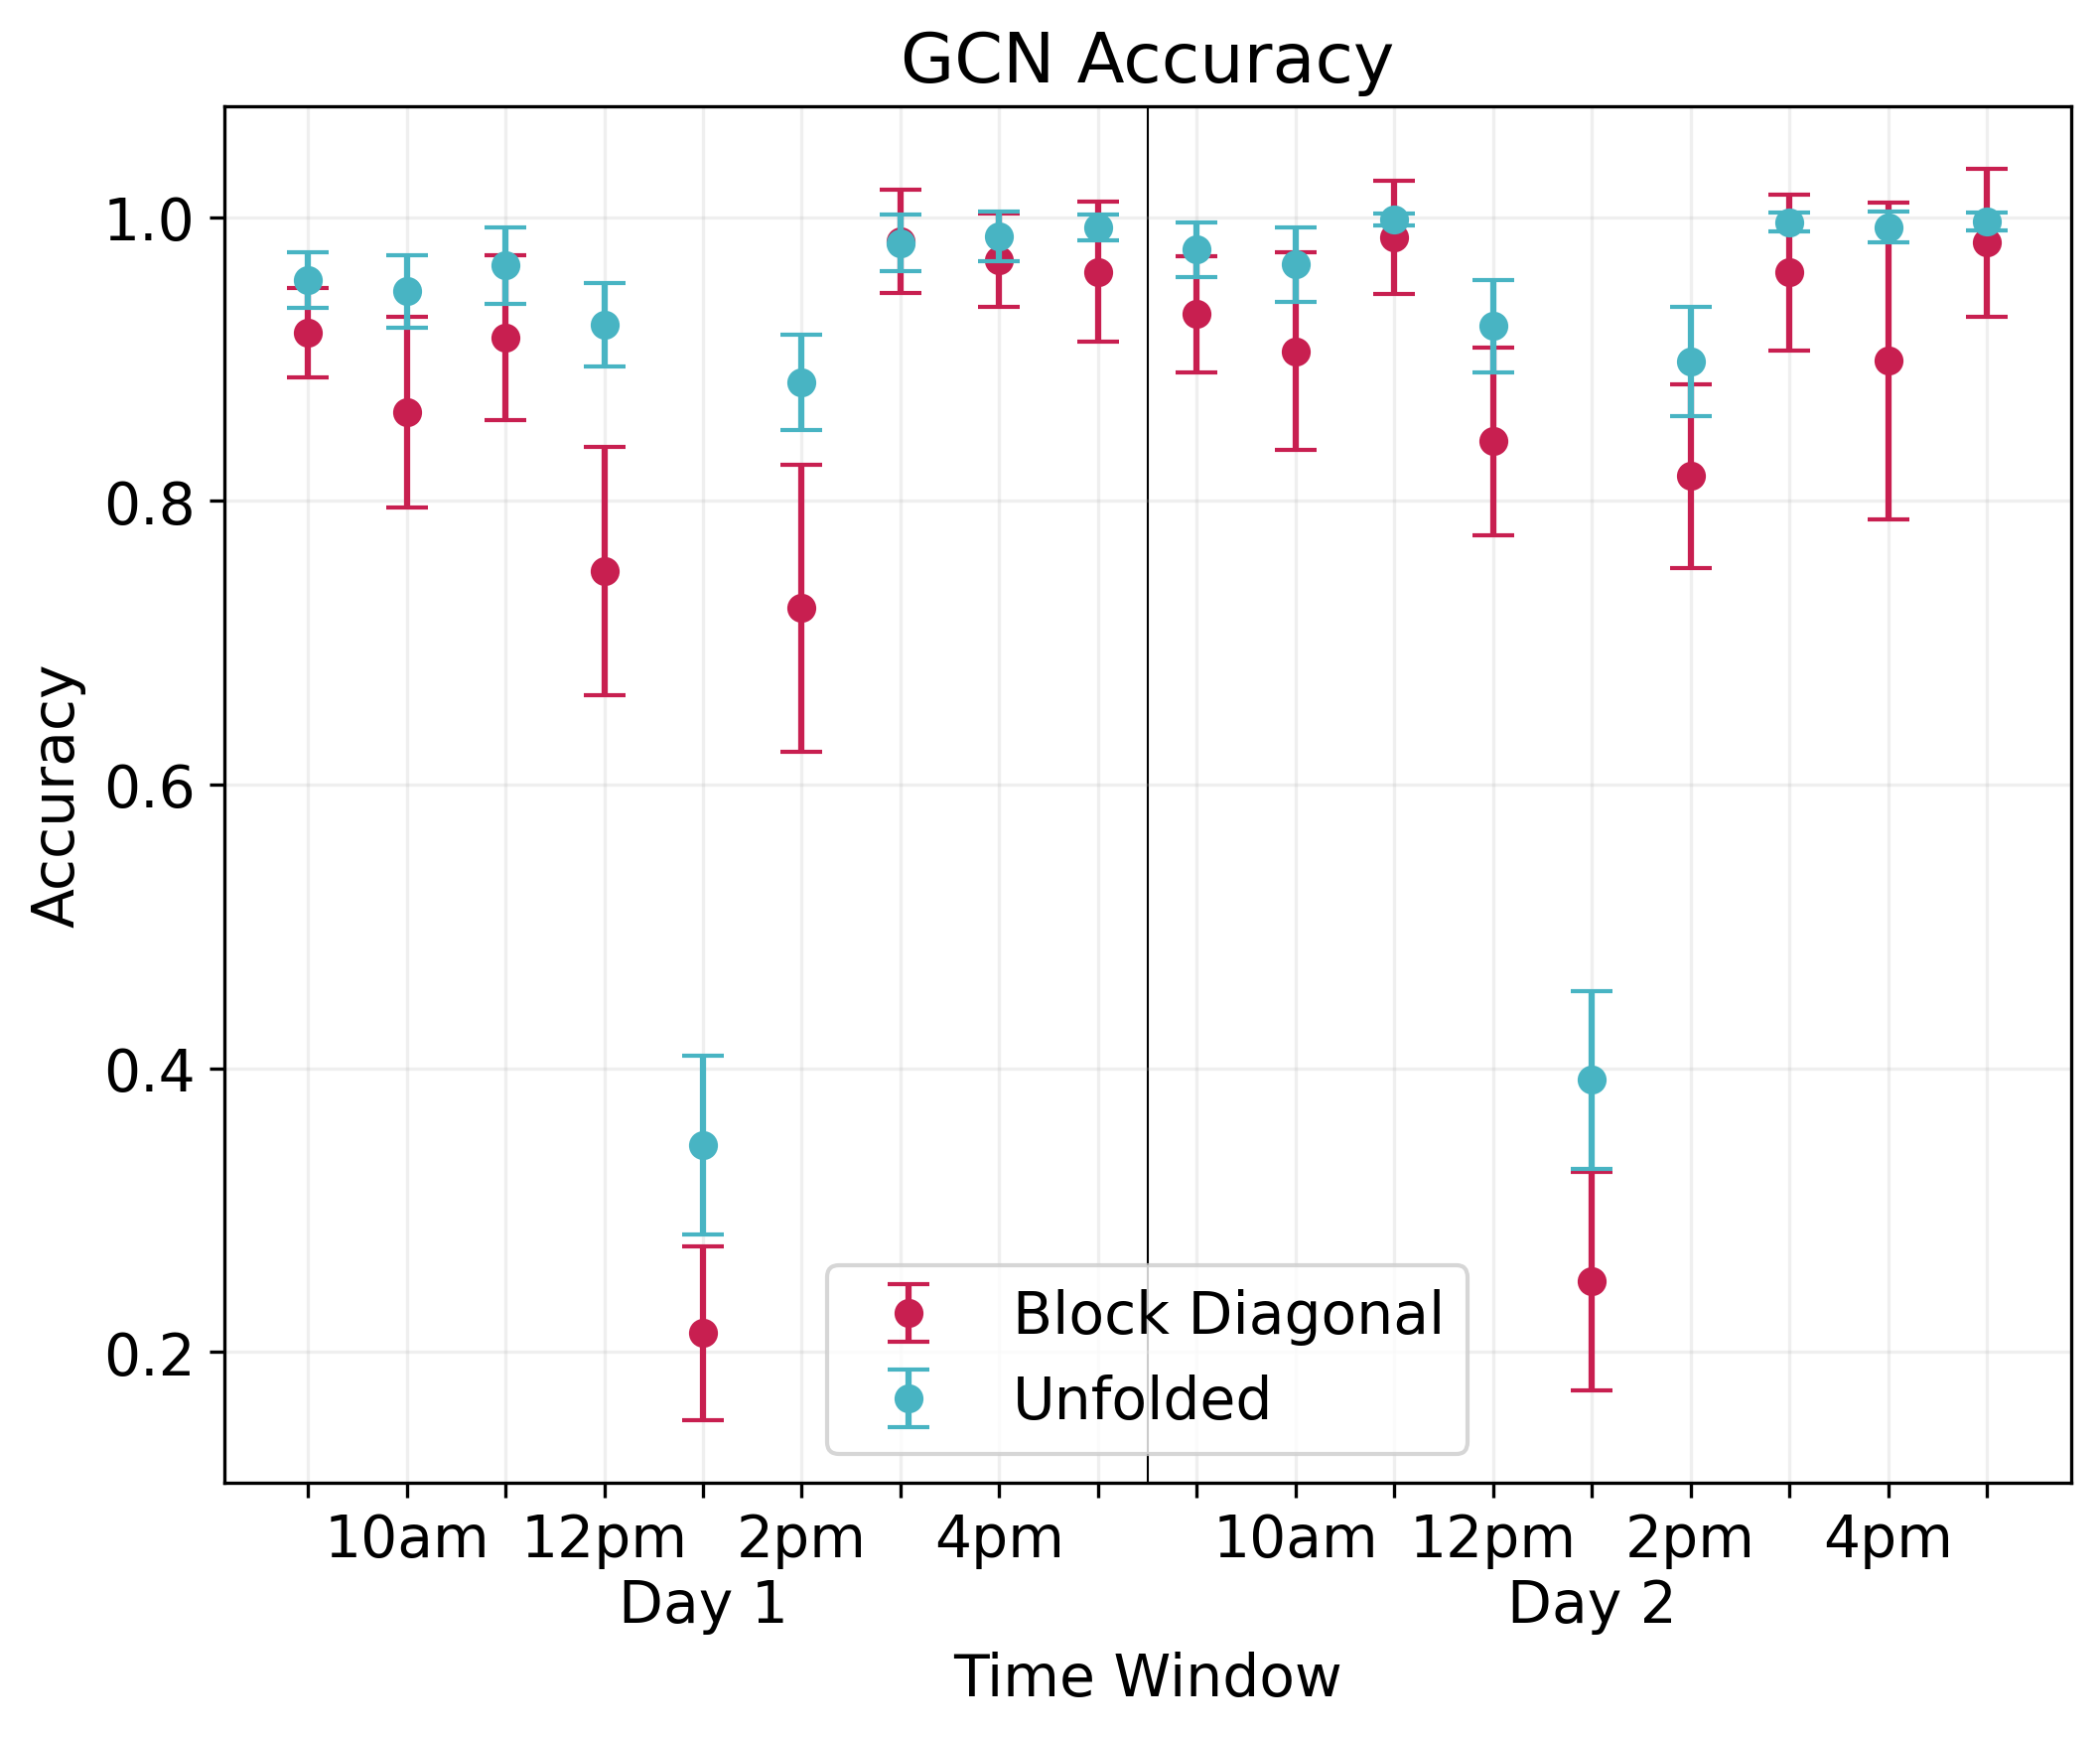

In [ ]:

plt.rcParams.update({'font.size': 14})
colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]
for (GNN_model, regime, output) in product(GNN_models, regimes, outputs):
    if output == 'Accuracy':
        output_str = 'Accuracy'
    if output == 'Avg Size':
        output_str = 'Prediction Set Size'
    if output == 'Coverage':
        output_str = 'Coverage'

    for GNN_model in GNN_models:
        fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)
    
        T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

        output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

        ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
        
        if output == 'Coverage':
            ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
        
        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Block Diagonal', zorder=2, c=colours[0])
    
        output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
        output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

        ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                    label='Unfolded', zorder=3, c=colours[1])
    
        ax.grid(alpha=0.2)
    
        ax.legend()
        
        ax.set_xticks(range(T))
        ax.set_xticklabels(xlabels)
        
        ax.set_title(GNN_model + ' ' + output_str)
        ax.set_xlabel('Time Window')
        ax.set_ylabel(output_str)
        
        # if save_figs:
        fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                    bbox_inches='tight');

In [ ]:
output_file_prefix ='annotated_figures/School_' 

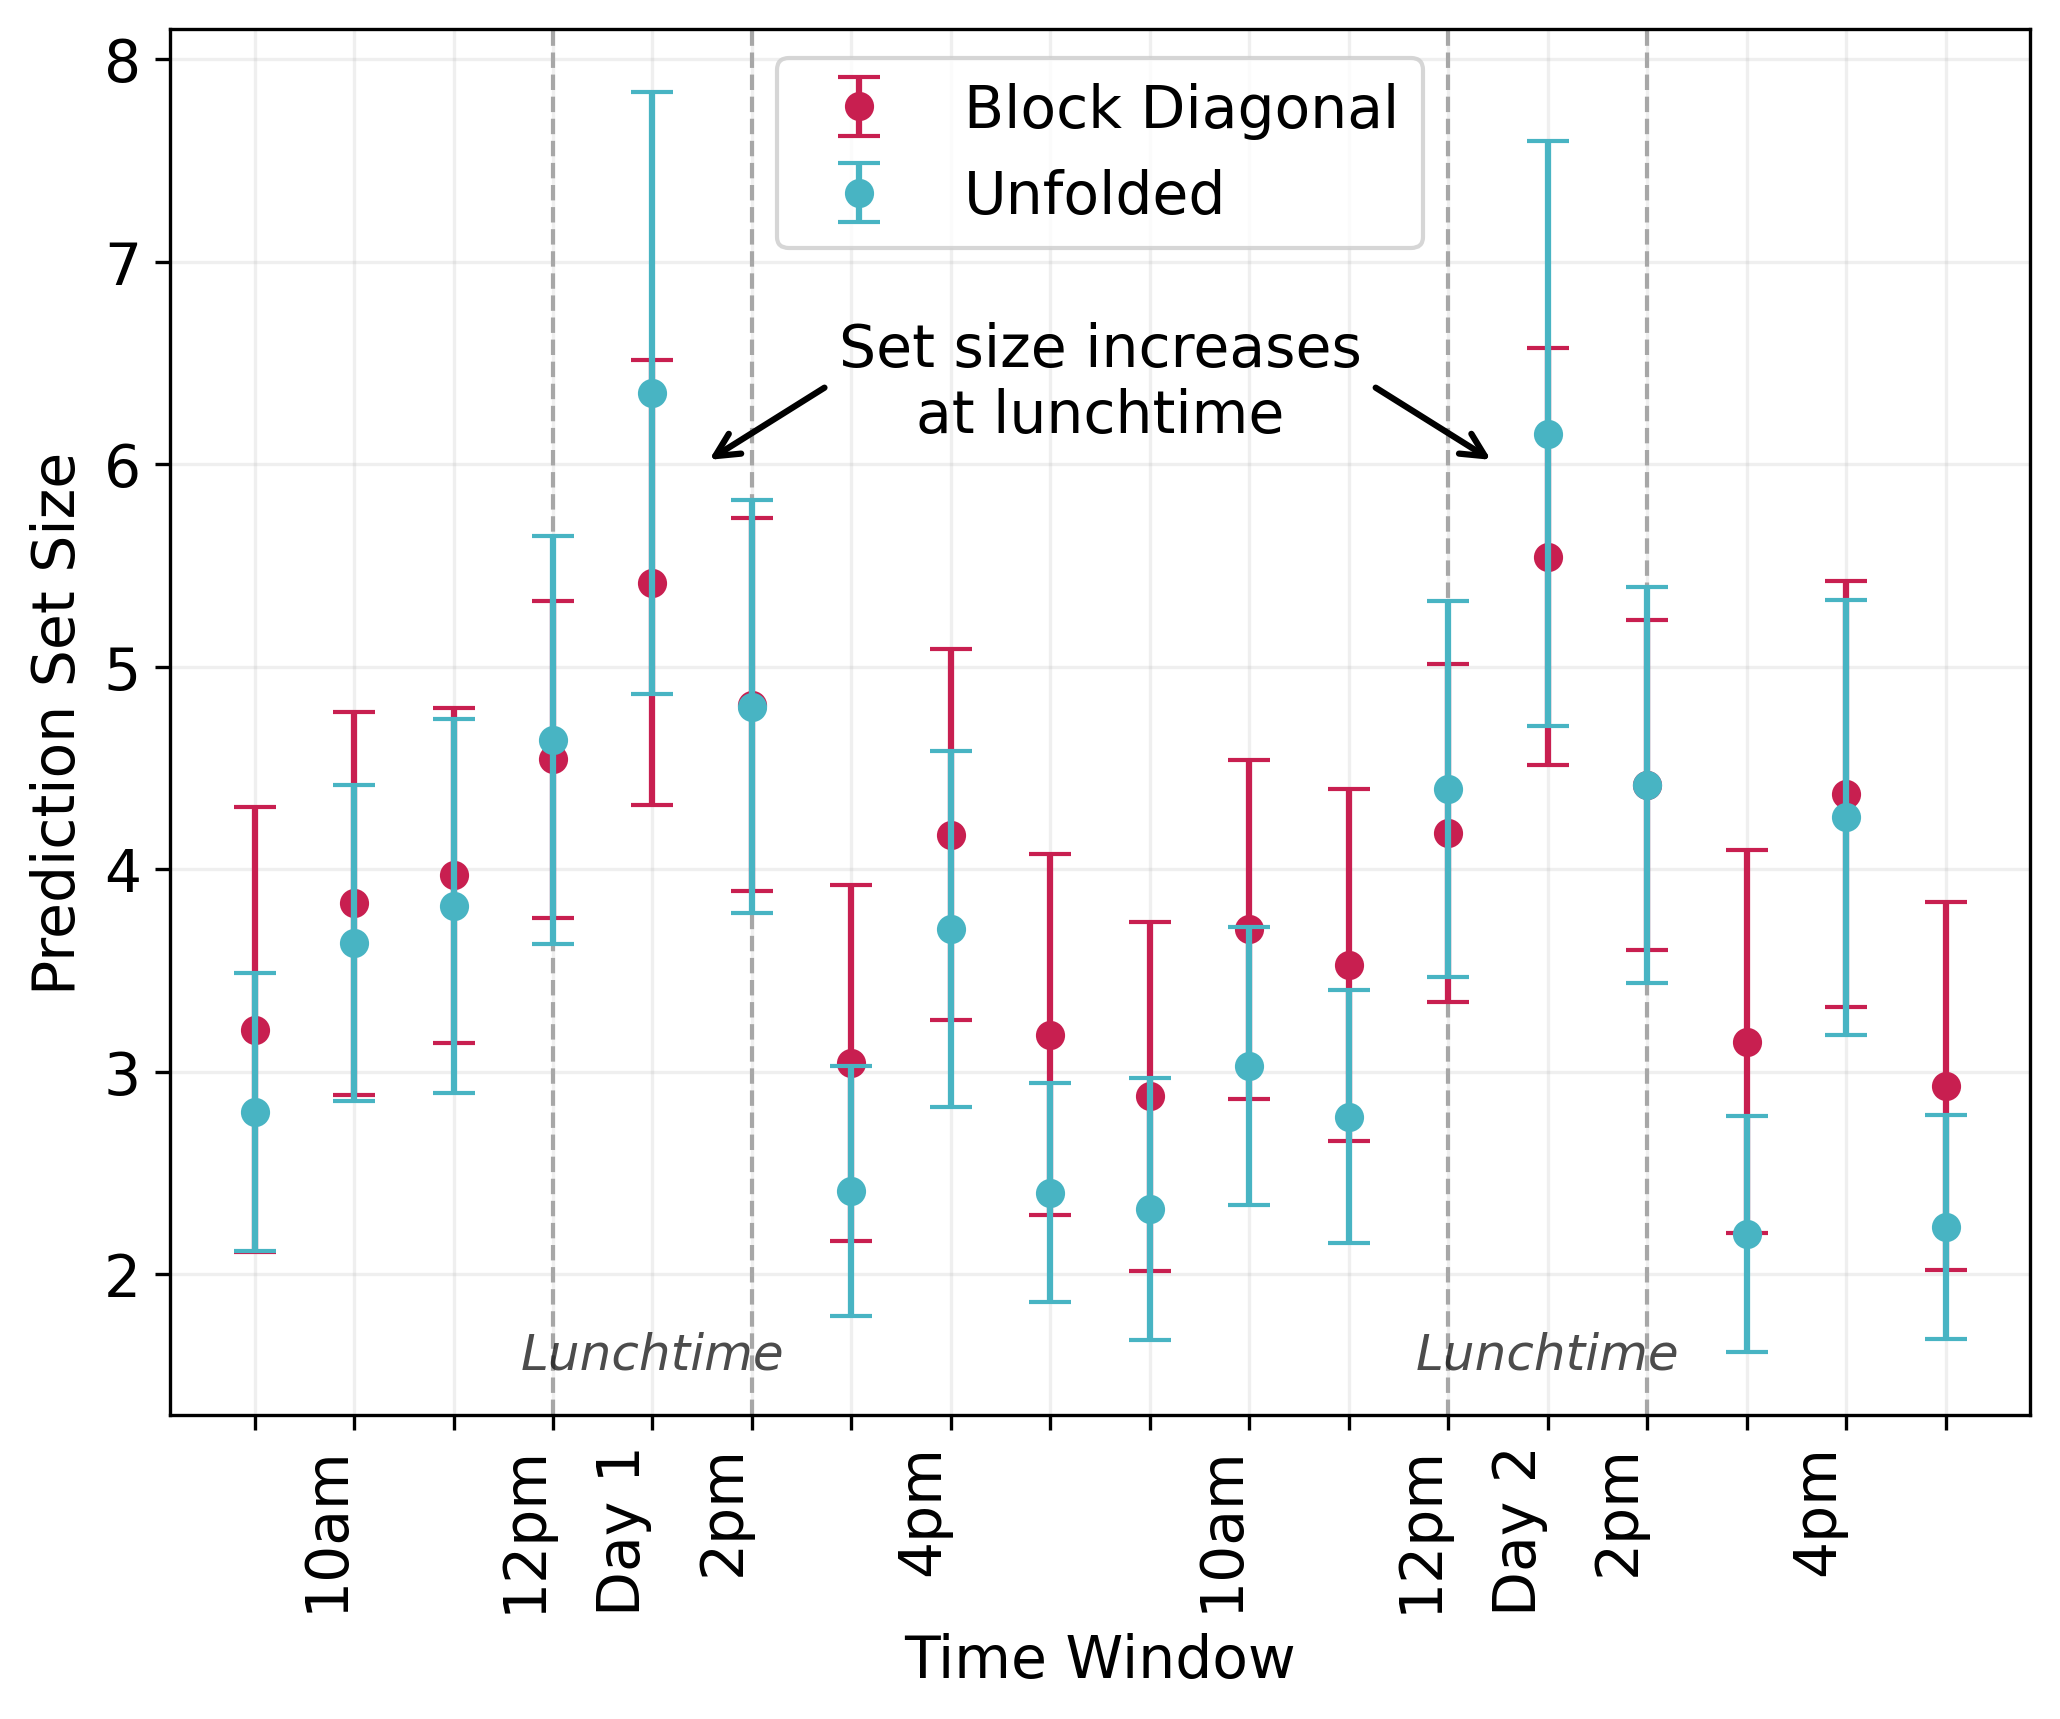

In [ ]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8.5, 6.4, 'Set size increases\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

## Specific plots

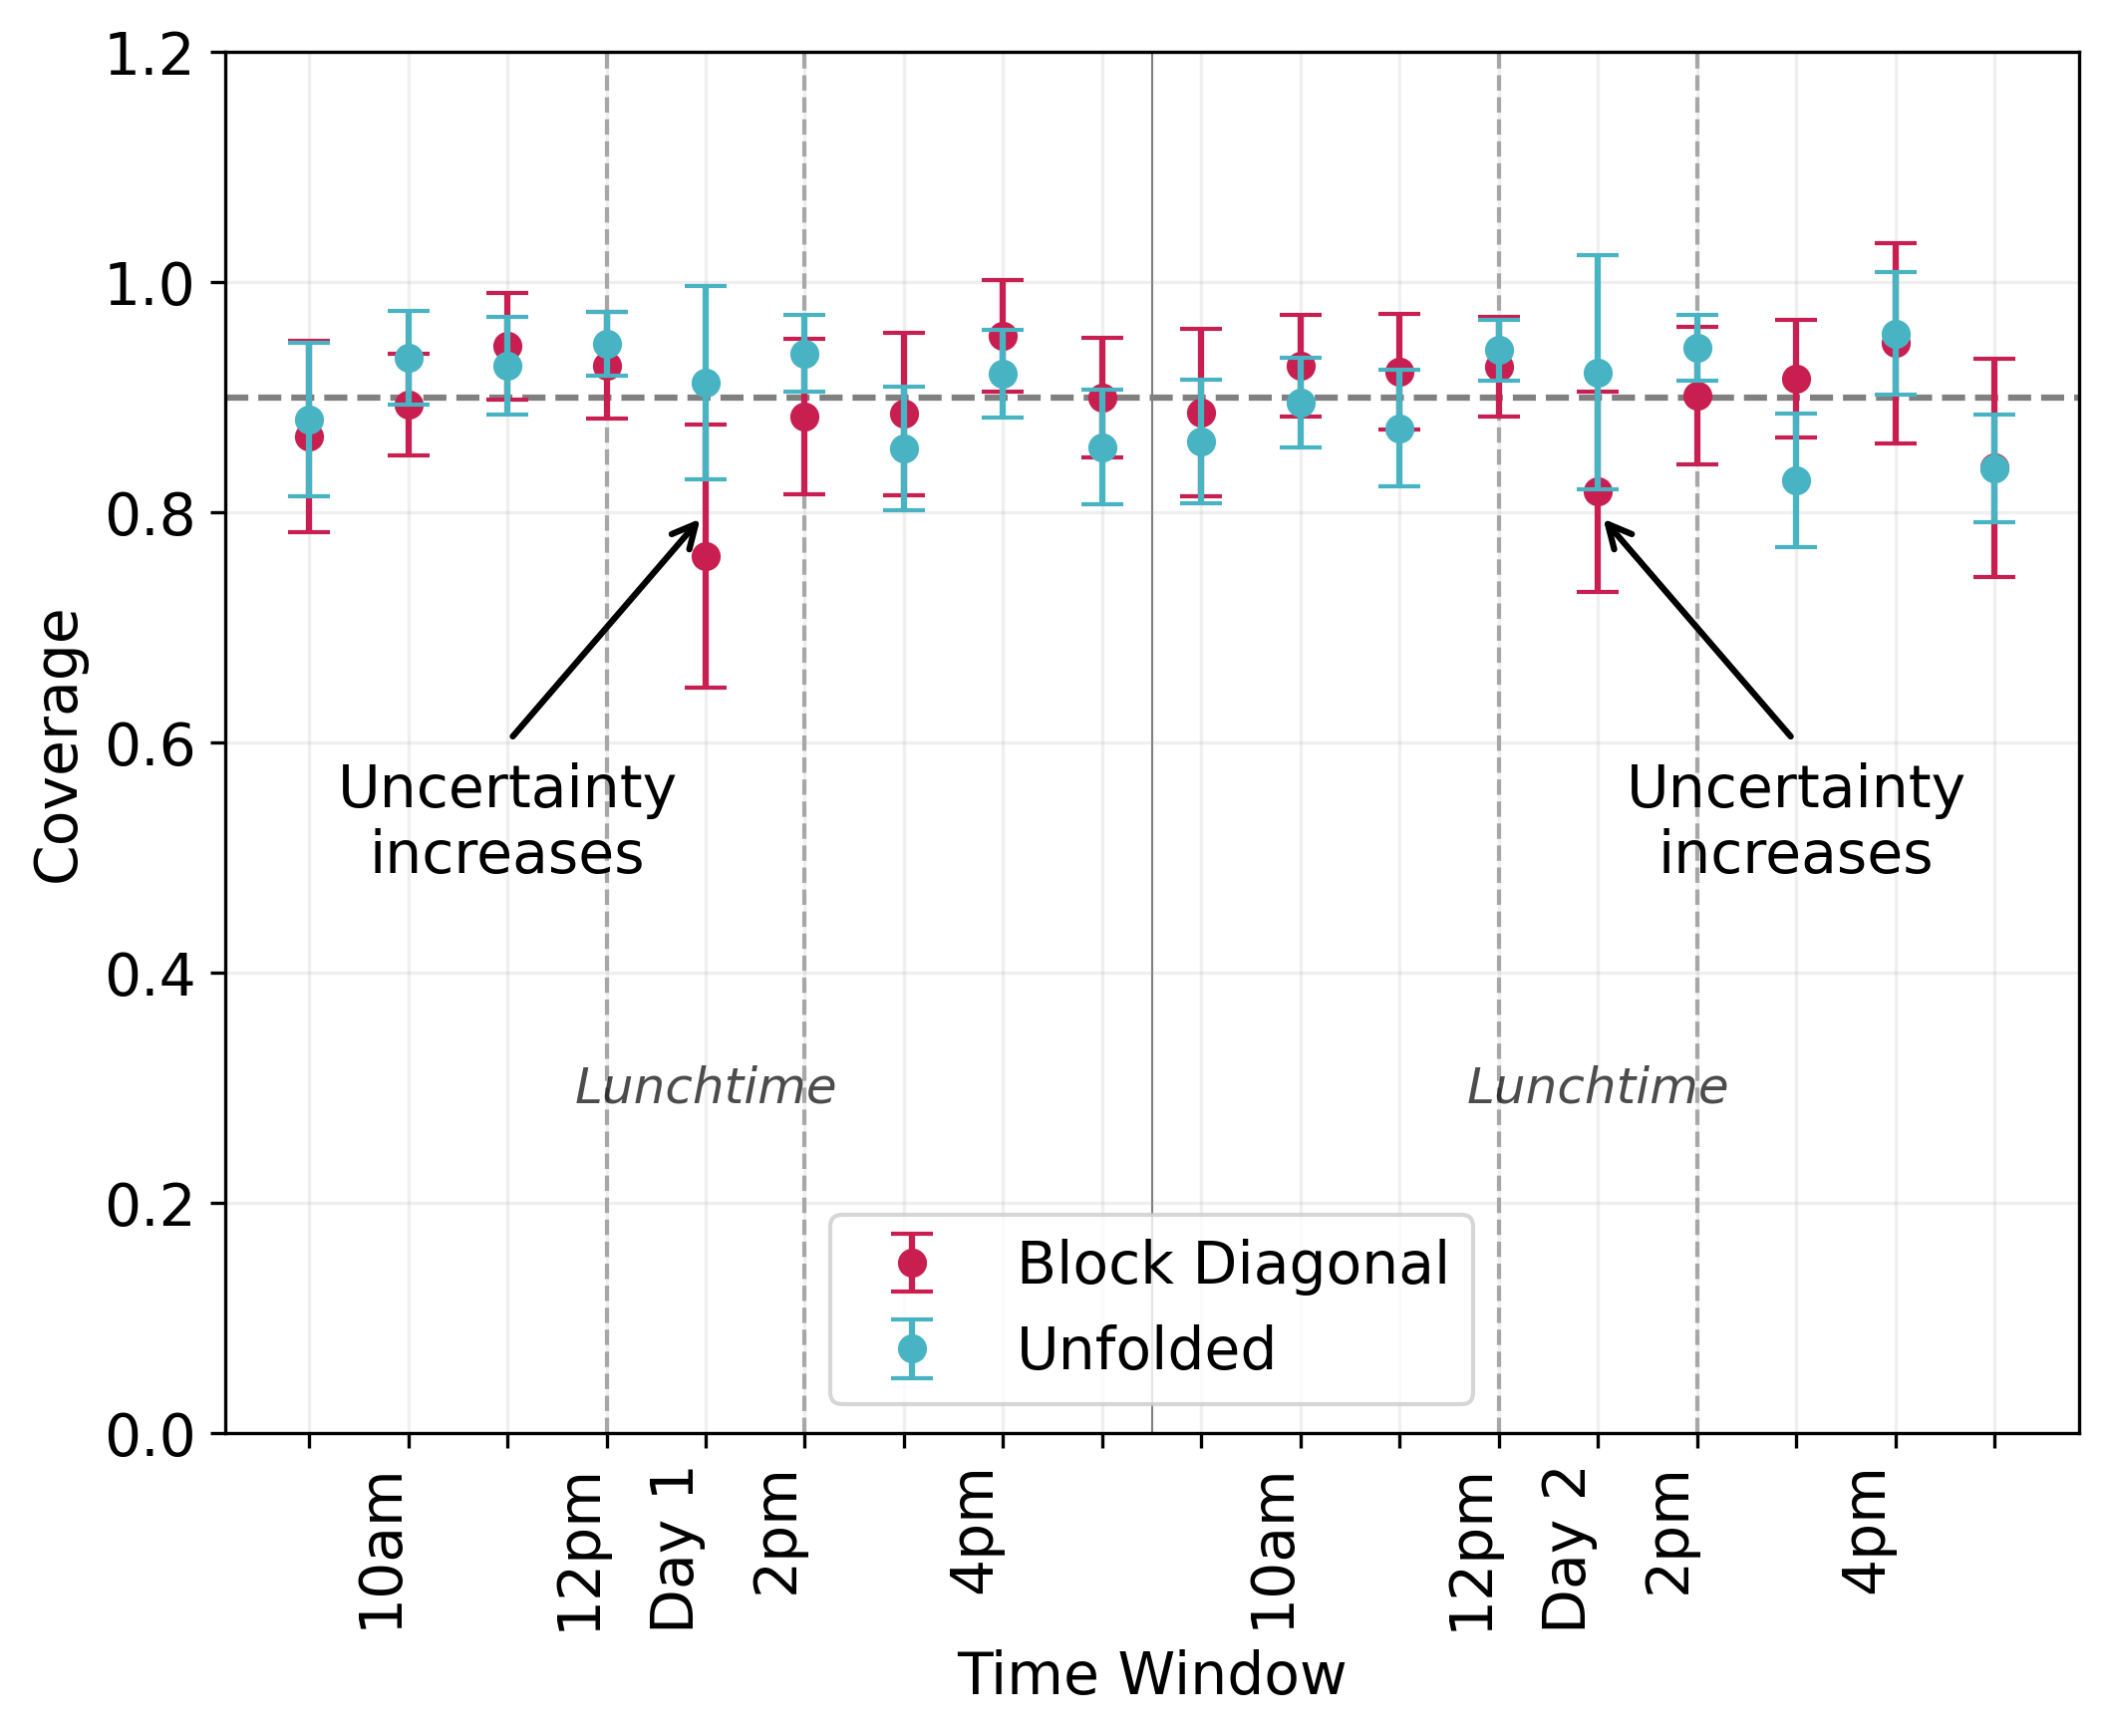

In [ ]:
output = "Coverage"
output_str = "Coverage"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    ax.text(2, 0.53, 'Uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4, 0.8), xytext=(2, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(15, 0.53, 'Uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.8), xytext=(15, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))



    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

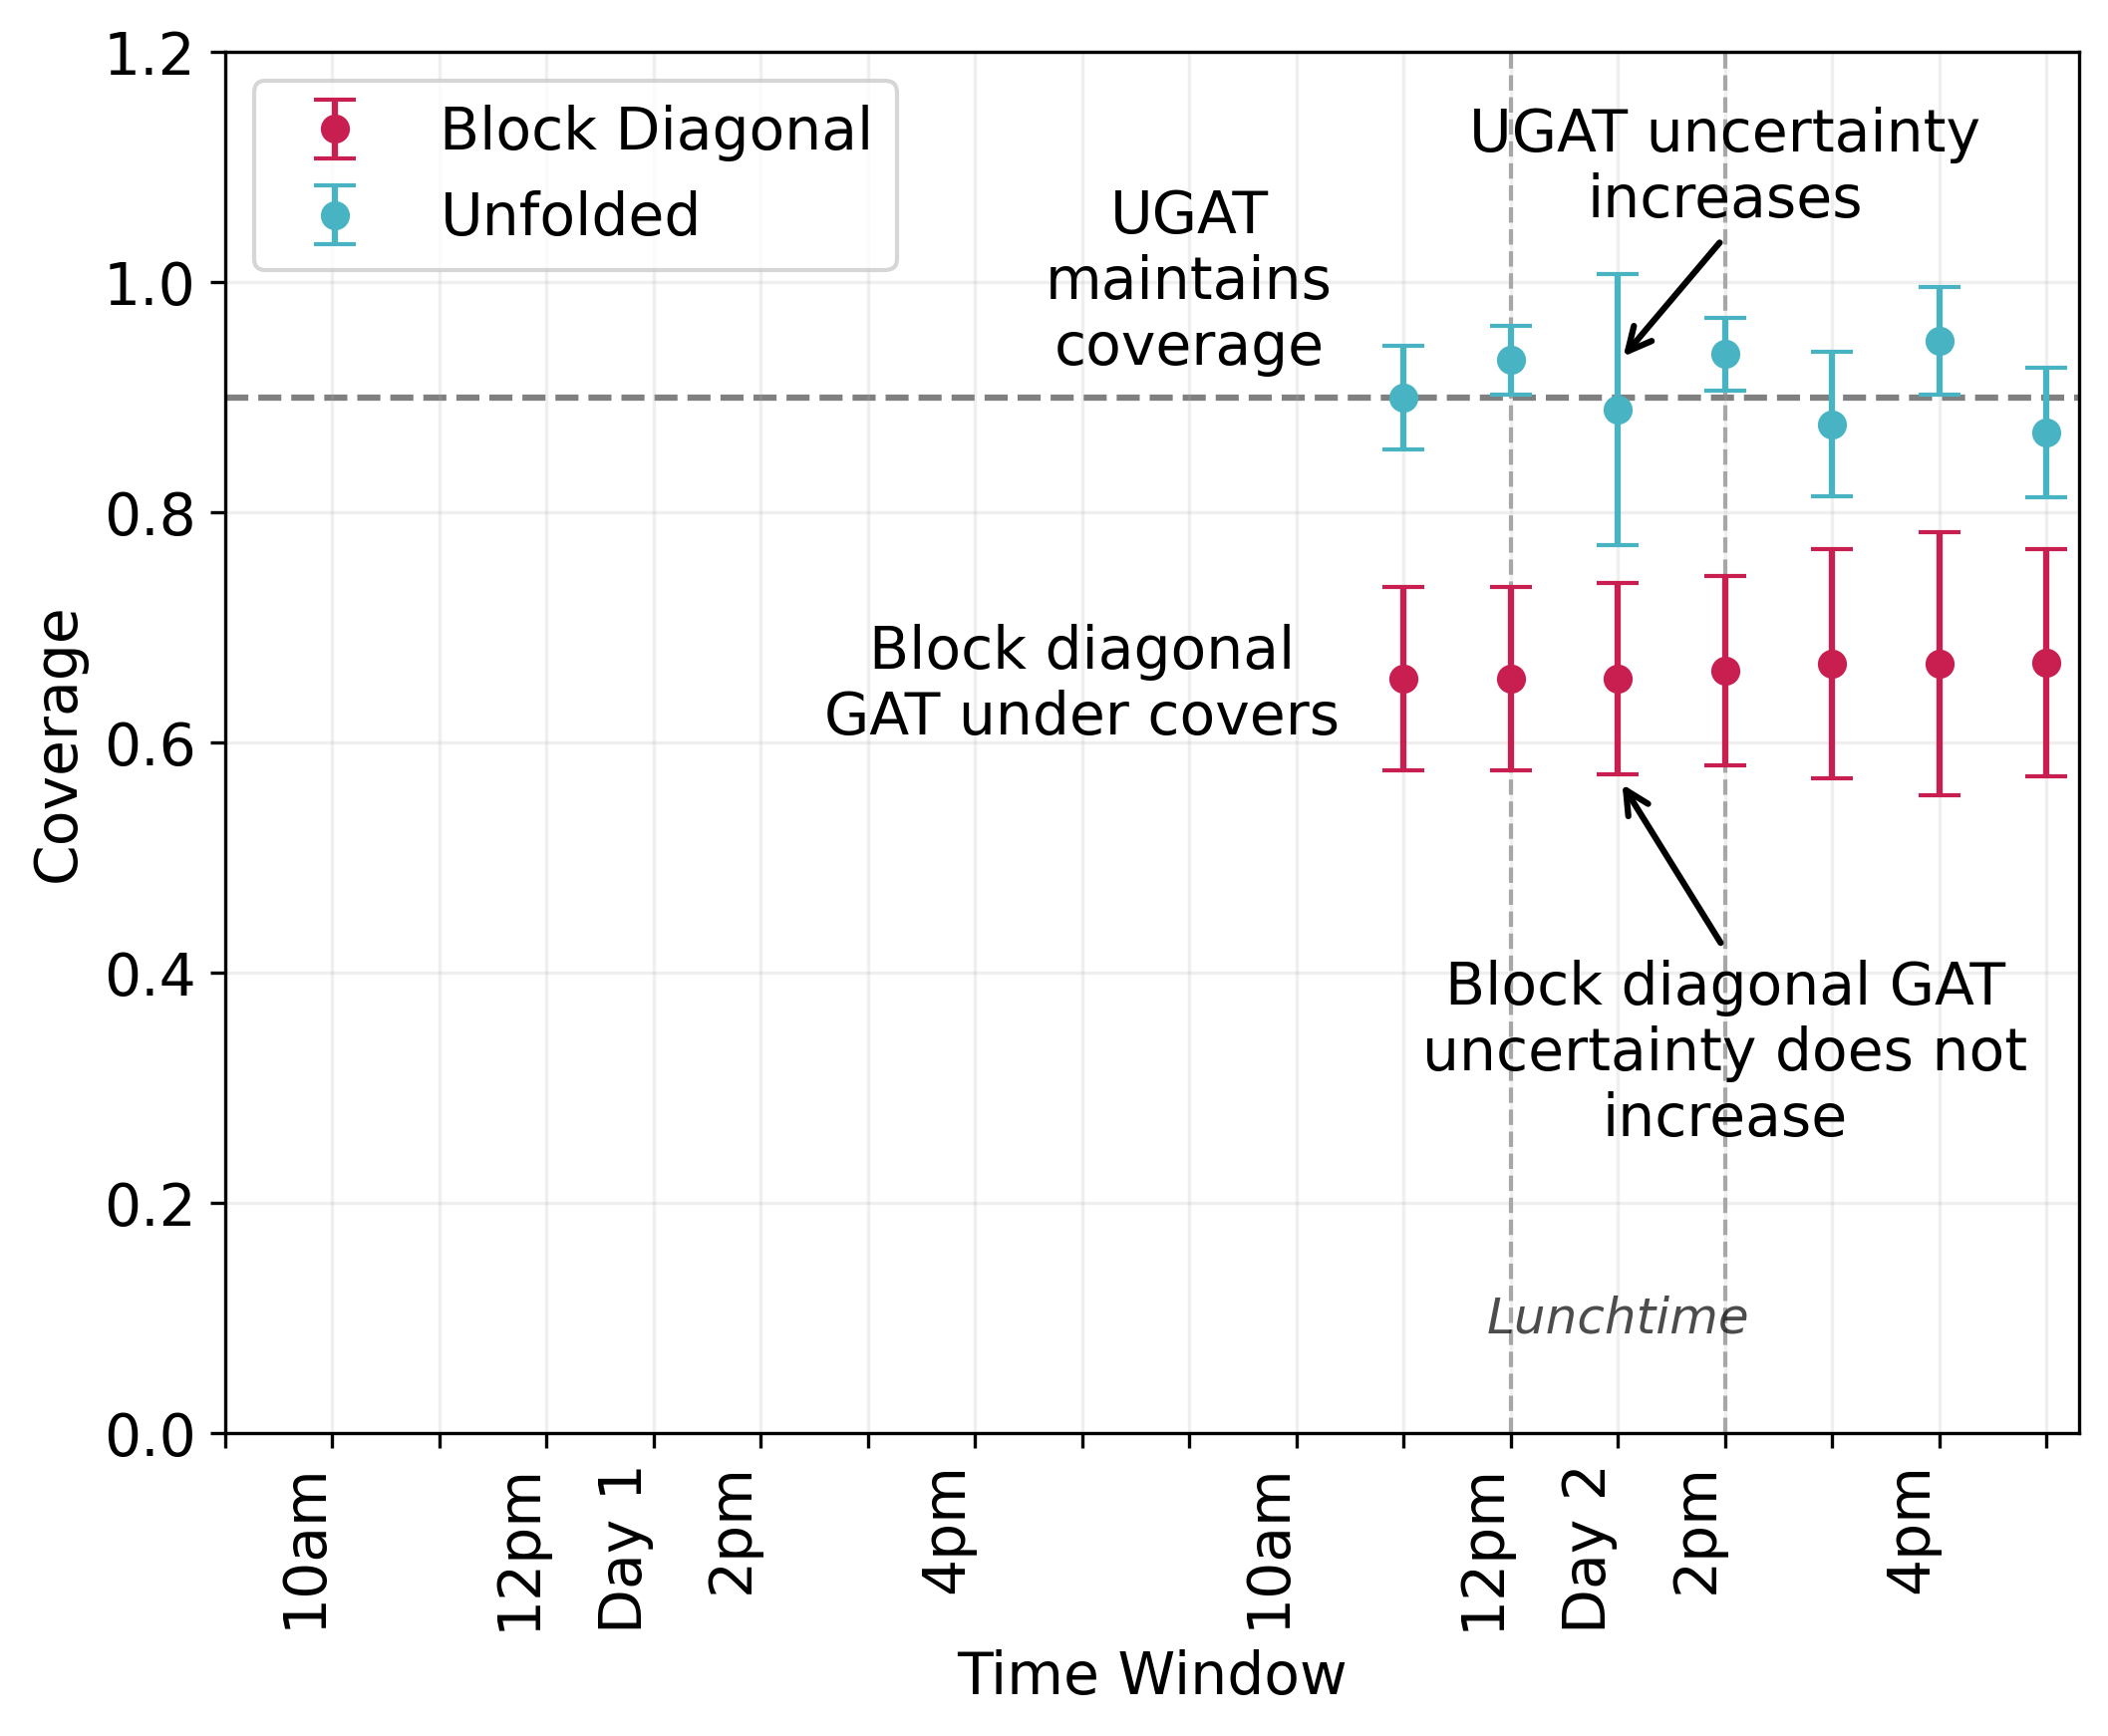

In [ ]:
output = "Coverage"
output_str = "Coverage"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    # ax.text(4, 0.3, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.5, fontsize=10, fontstyle='italic')
    ax.text(13, 0.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Uncertainty\nincreases', fontsize=12, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.8), xytext=(2, 0.6), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(14, 1.1, 'UGAT uncertainty\nincreases', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.93), xytext=(14, 1.04), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(9, 1, 'UGAT\nmaintains\ncoverage', fontsize=14, ha='center', va='center')

    ax.text(14, 0.33, 'Block diagonal GAT\nuncertainty does not\nincrease', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.57), xytext=(14, 0.42), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8, 0.65, 'Block diagonal\nGAT under covers', fontsize=14, ha='center', va='center')


    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

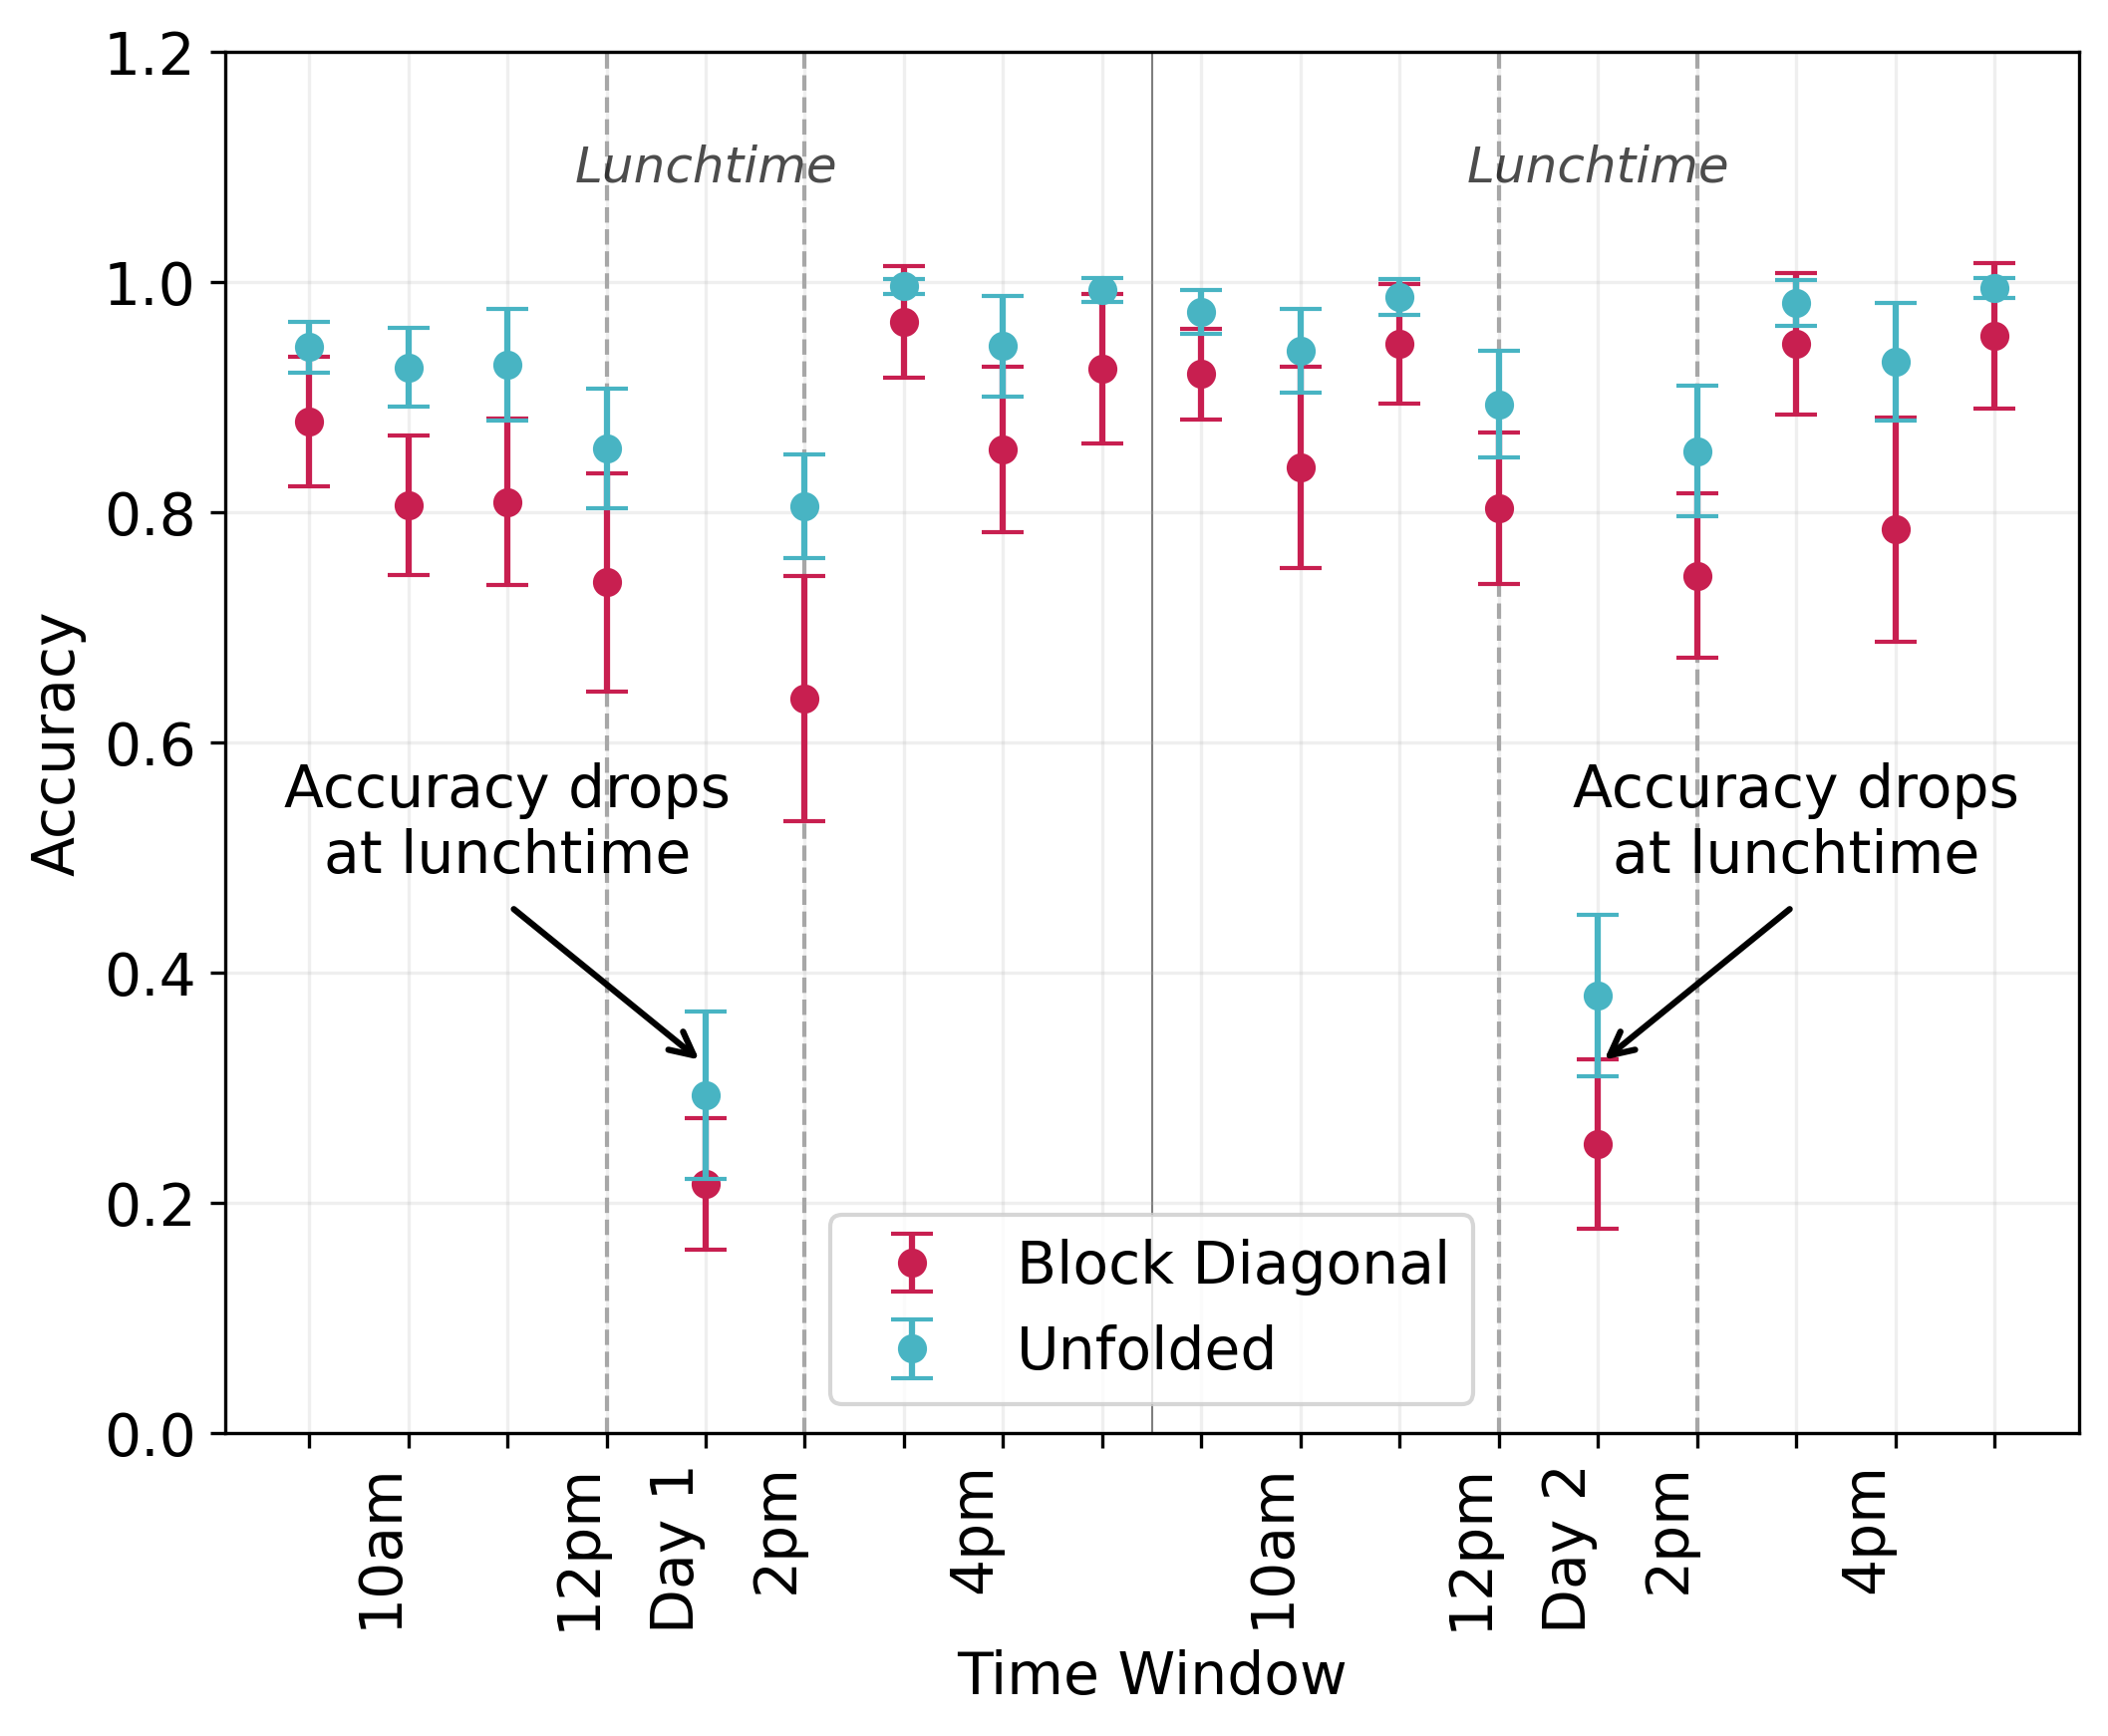

In [ ]:
output = "Accuracy"
output_str = "Accuracy"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.1, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))



    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

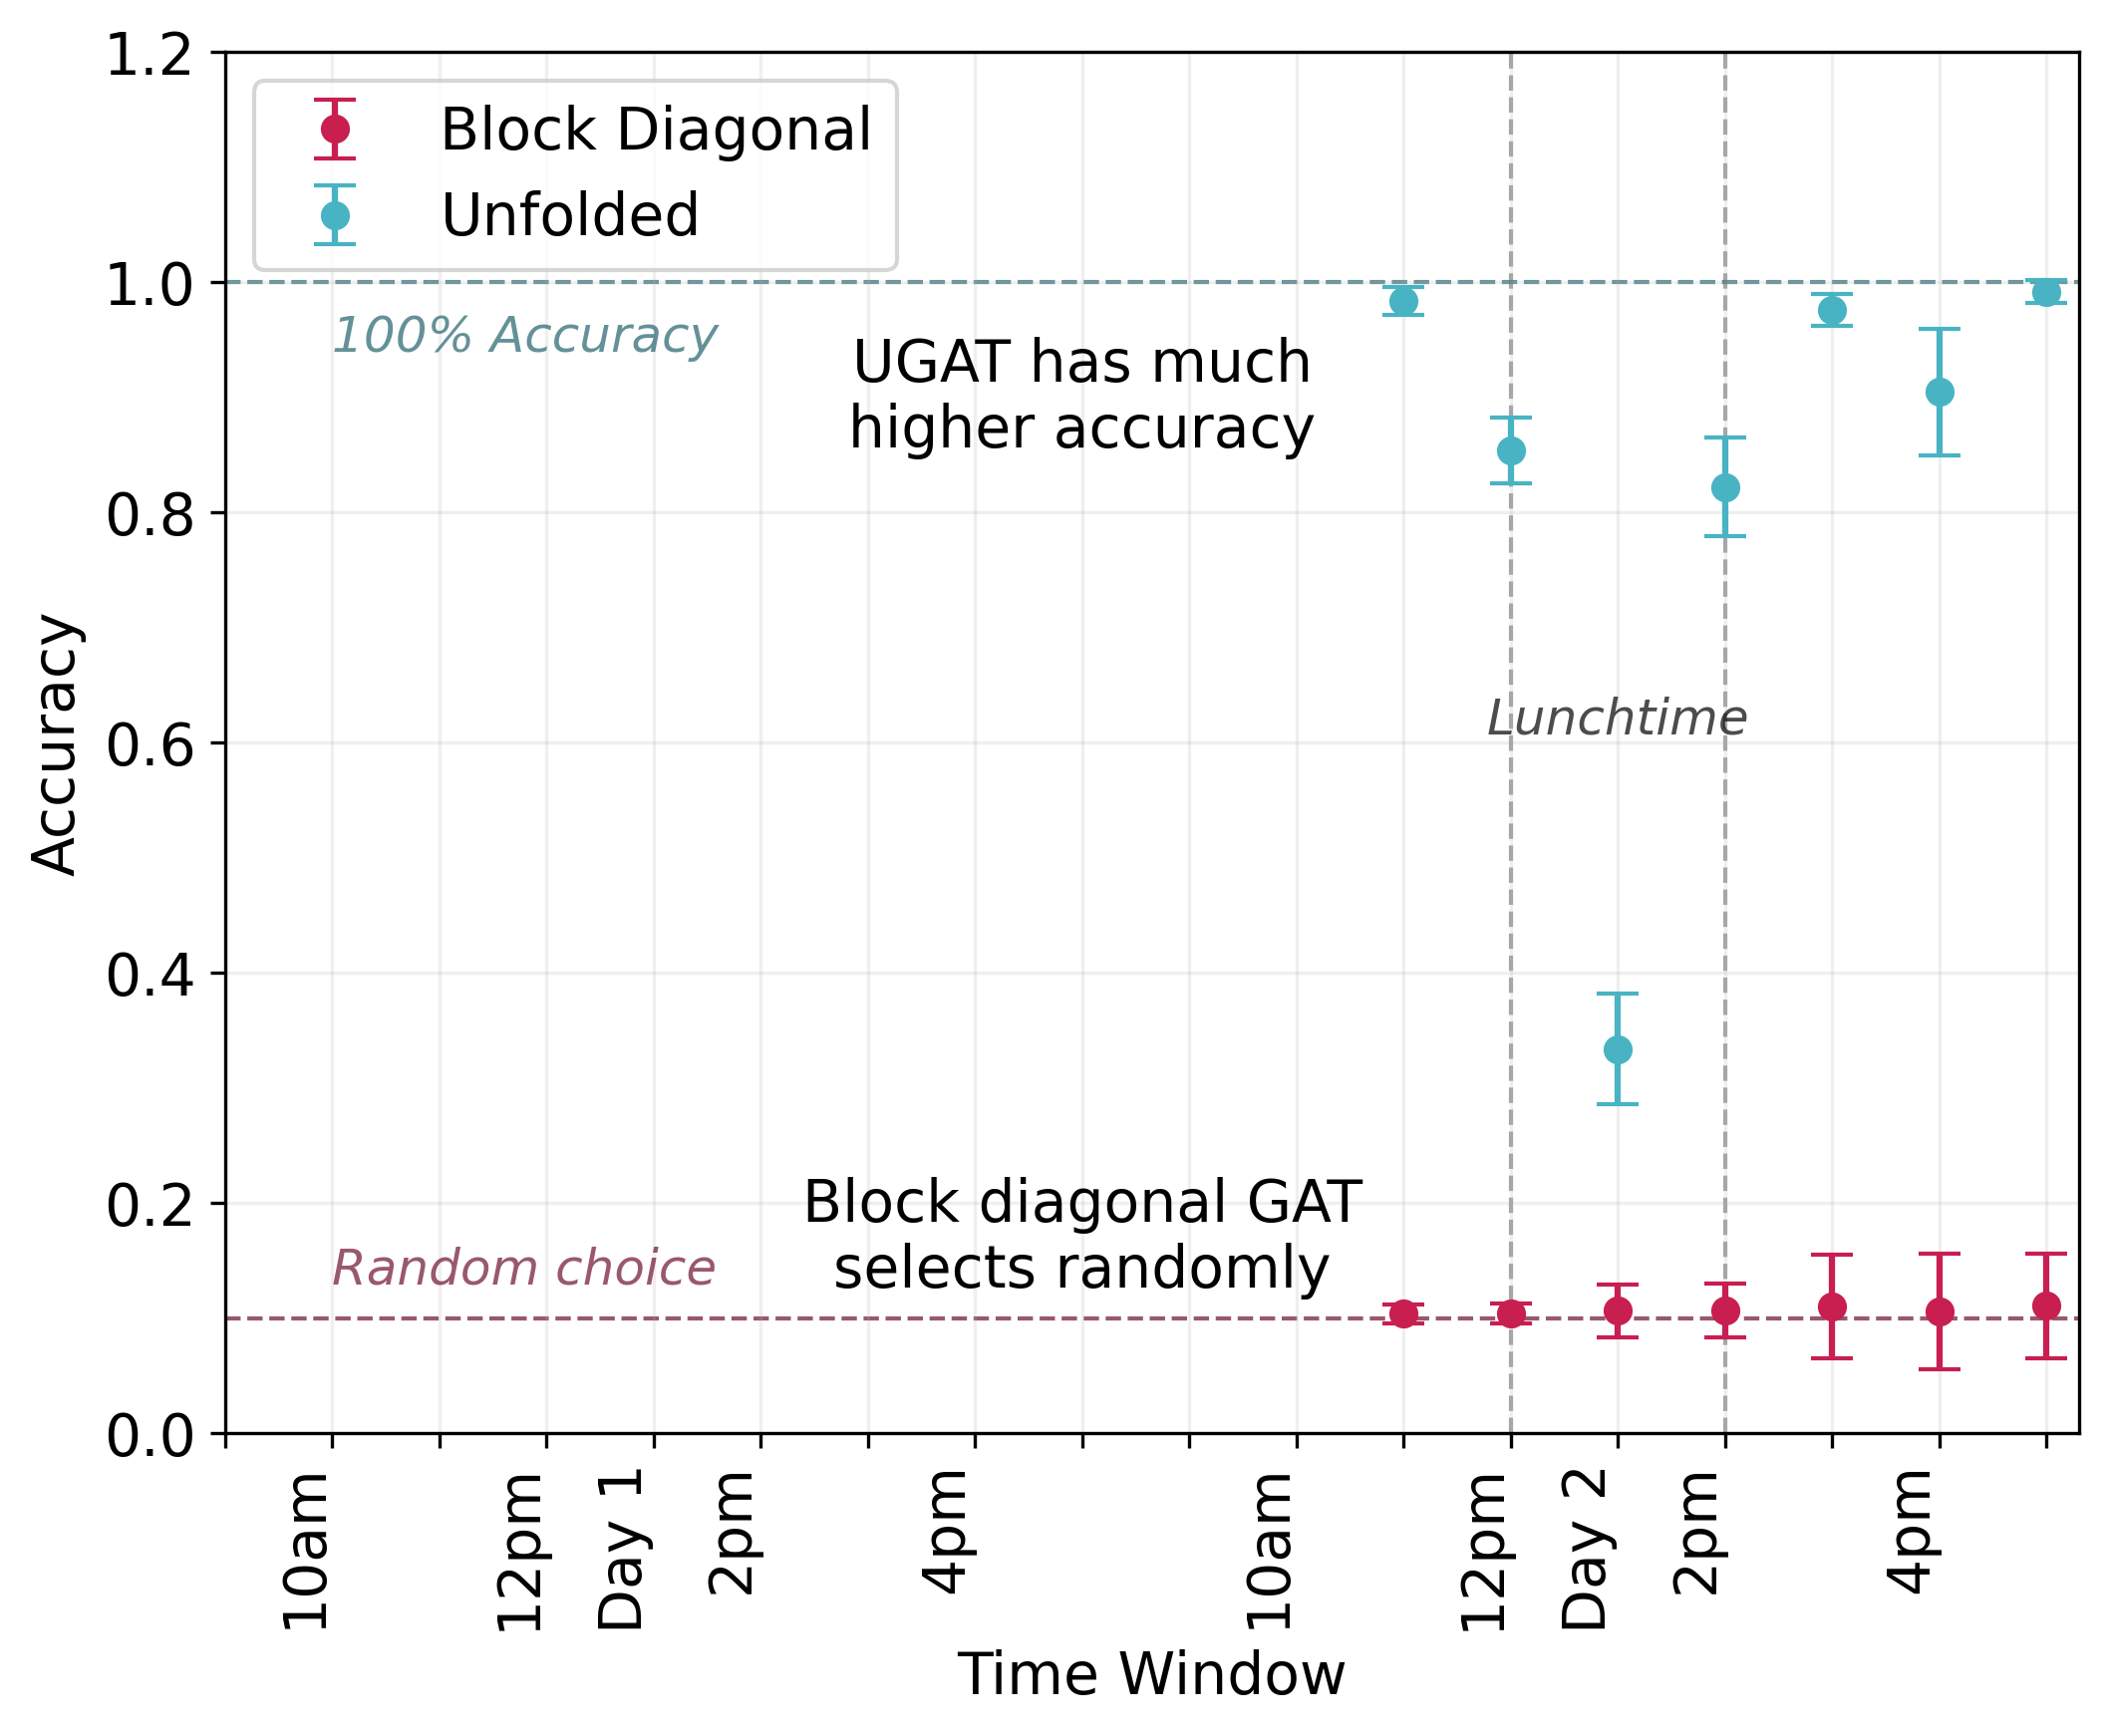

In [ ]:
output = "Accuracy"
output_str = "Accuracy"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    ax.text(13, 0.62, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')

    ax.text(1, 0.94, '100% Accuracy', alpha=0.7, fontsize=12, fontstyle='italic', c='#23636C')
    ax.axhline(1, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7, c='#23636C')

    ax.text(8, 0.9, 'UGAT has much\nhigher accuracy', fontsize=14, ha='center', va='center')

    ax.text(1, 0.13, 'Random choice', alpha=0.7, fontsize=12, fontstyle='italic', c='#6E112C')
    ax.axhline(0.1, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7, c='#6E112C')


    ax.text(8, 0.17, 'Block diagonal GAT\nselects randomly', fontsize=14, ha='center', va='center')


    # Crop the figures to be from y=0 to y=1
    ax.set_ylim(0, 1.2)


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

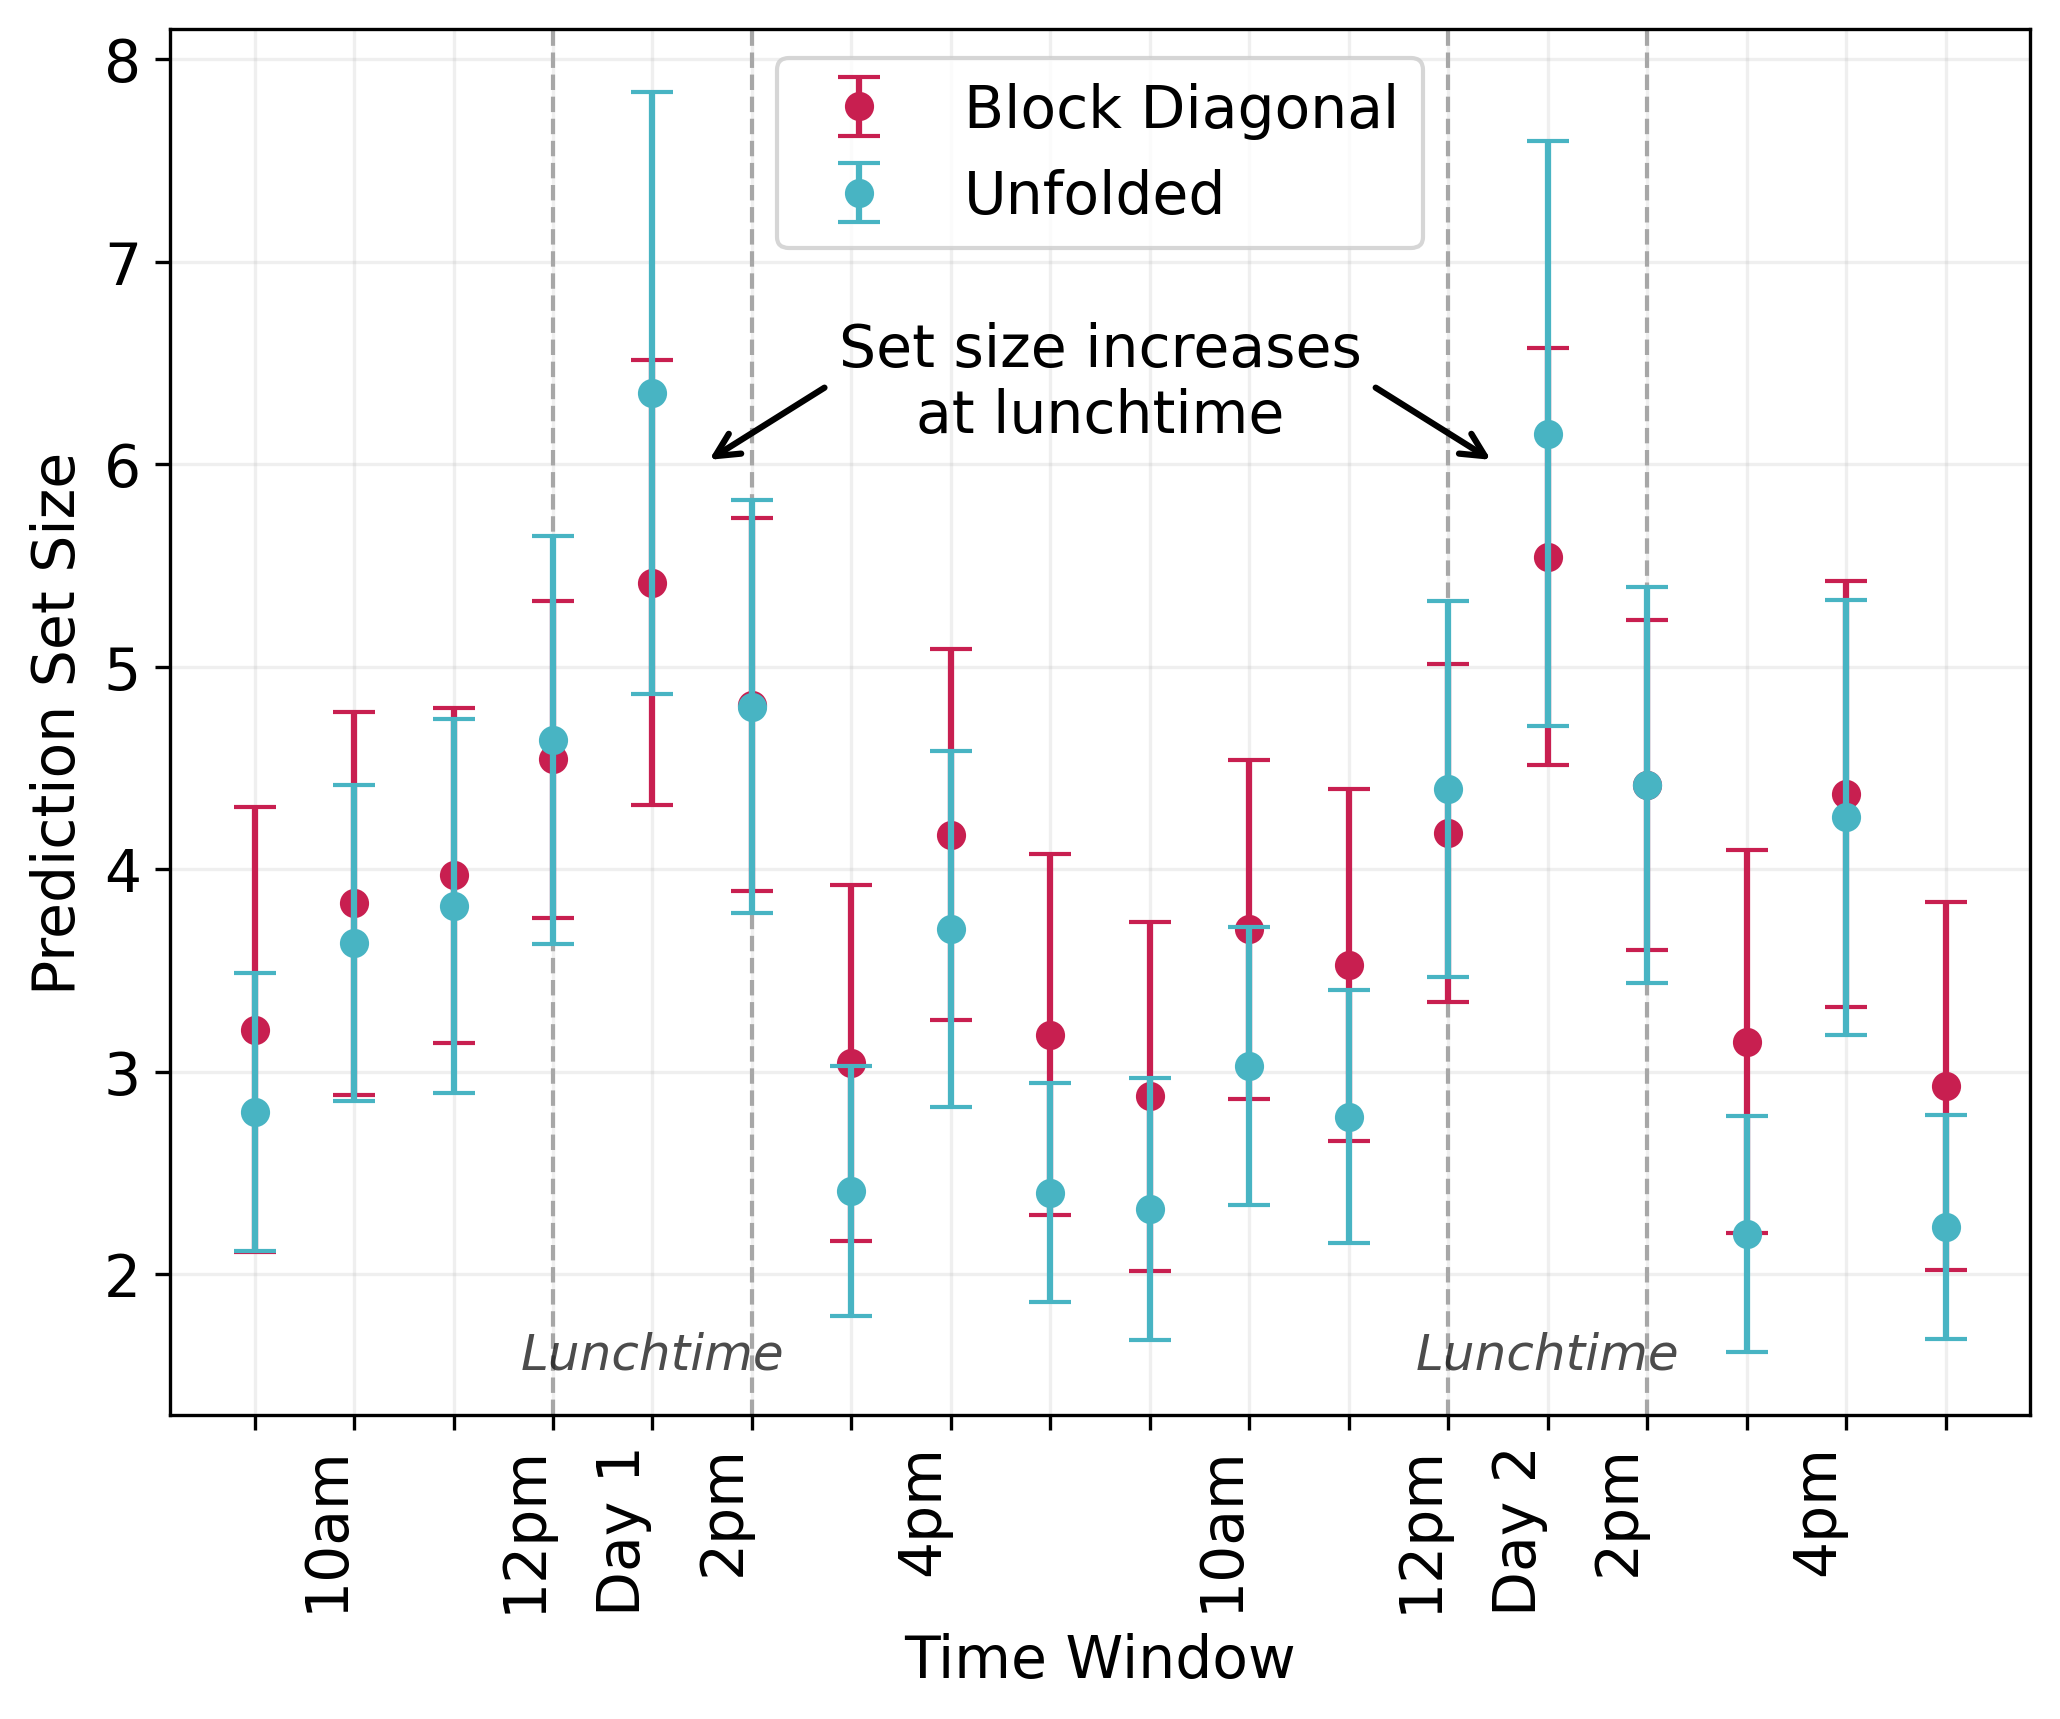

In [ ]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Trans"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(8.5, 6.4, 'Set size increases\nat lunchtime', fontsize=14, ha='center', va='center')
    ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))


    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');

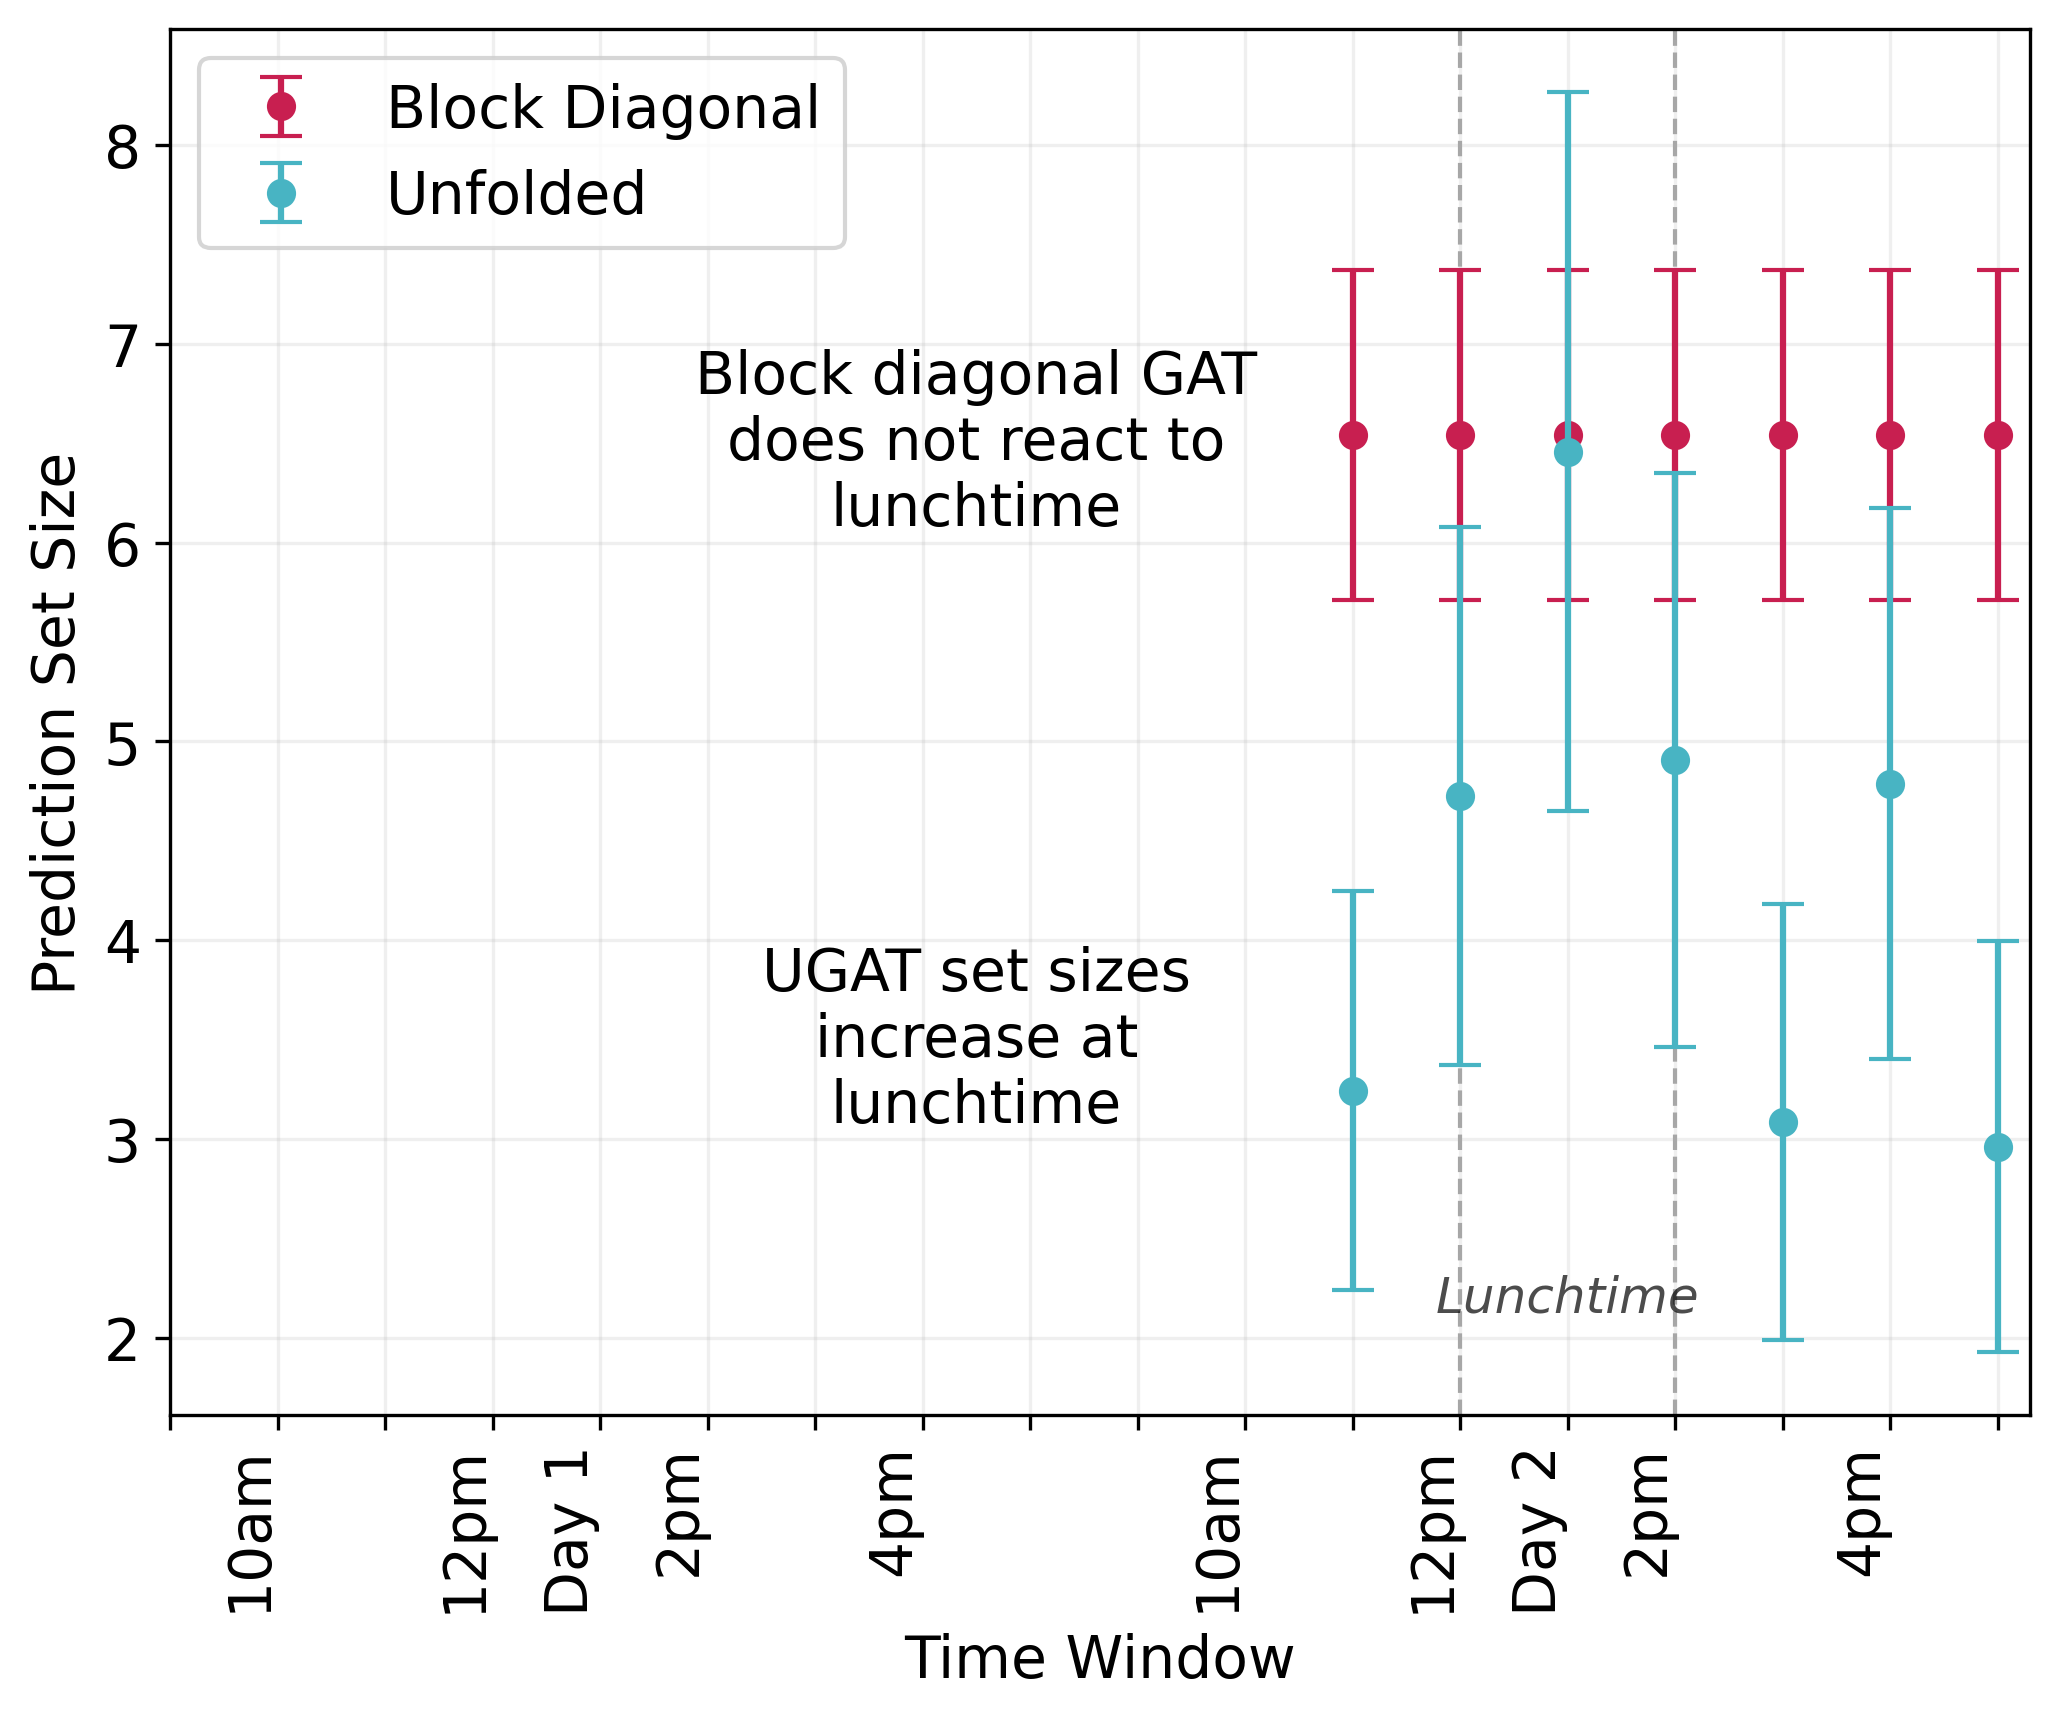

In [ ]:
output = "Avg Size"
output_str = "Prediction Set Size"
regime = "Semi-Ind"
GNN_models = ["GAT"]

colours = ["#C81F50", "#48B4C3", "#3B1D32", "#B77045", "#F6CB52", "#674FC9"]

# inrease text size
plt.rcParams.update({'font.size': 14})

for GNN_model in GNN_models:
    fig, ax = plt.subplots(1, 1, figsize=(8, 6), dpi=300)

    T_output = np.where(np.array([len(results['BD'][GNN_model][regime][output][t]) for t in range(T)]) > 0)[0]

    output_time_mean = [np.mean(results['BD'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['BD'][GNN_model][regime][output][t]) for t in T_output]

    # ax.axvline((T-1)/2, color='black', lw=0.5, zorder=1, alpha=0.5)
    
    if output == 'Coverage':
        ax.axhline(1 - alpha, color='grey', linestyle='--', zorder=1)
    
    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Block Diagonal', zorder=2, c=colours[0])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=3, label='Block Diagonal')

    output_time_mean = [np.mean(results['UA'][GNN_model][regime][output][t]) for t in T_output]
    output_time_std = [np.std(results['UA'][GNN_model][regime][output][t]) for t in T_output]

    ax.errorbar(T_output, output_time_mean, output_time_std, marker='o', capsize=5, ls='None',
                label='Unfolded', zorder=3, c=colours[1])

    # ax.plot(T_output, output_time_mean, marker='o', ls='-', zorder=4, label='Unfolded')



    # ax.axvline(3, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    # ax.axvline(5, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(12, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)
    ax.axvline(14, color='grey', linestyle='--', zorder=1, lw=1, alpha=0.7)

    # ax.fill_between([3, 5], y1=0, y2=1, color='grey', alpha=0.1)
    # ax.fill_between([12, 14], y1=0, y2=1, color='grey', alpha=0.1)

    # ax.text(4, 1.6, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')
    ax.text(13, 2.2, 'Lunchtime', ha='center', va='center', rotation=0, alpha=0.7, fontsize=12, fontstyle='italic')


    # ax.text(2, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4, 0.32), xytext=(2, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    # ax.text(15, 0.53, 'Accuracy drops\nat lunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(13, 0.32), xytext=(15, 0.46), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(7.5, 3.5, 'UGAT set sizes\nincrease at\nlunchtime', fontsize=14, ha='center', va='center')
    # ax.annotate('', xy=(4.5, 6), xytext=(5.8, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))
    # ax.annotate('', xy=(12.5, 6), xytext=(11.2, 6.4), arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

    ax.text(7.5, 6.5, 'Block diagonal GAT\ndoes not react to\nlunchtime', fontsize=14, ha='center', va='center')

    ax.grid(alpha=0.2)

    ax.legend()

    plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
    
    ax.set_xticks(range(T))
    ax.set_xticklabels(xlabels)
    
    # ax.set_title(GNN_model + ' ' + output_str)
    ax.set_xlabel('Time Window')
    ax.set_ylabel(output_str)
    
    fig.savefig(output_file_prefix + regime + '_' + GNN_model + '_' + output + output_file_suffix,
                bbox_inches='tight');